In [ ]:
from google.colab import auth
auth.authenticate_user()
print("Authenticated")

Authenticated


**1.	Import the dataset and do usual exploratory analysis steps like checking the structure & characteristics of the dataset**


1.	Data type of columns in a table

a. Customer Table

In [ ]:
%%bigquery --project target-365214 CustomerTableDataTypes
SELECT
  COLUMN_NAME,
  DATA_TYPE
FROM
  Target_Data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name = 'customers'

In [ ]:
CustomerTableDataTypes

,COLUMN_NAME,DATA_TYPE
0,customer_id,STRING
1,customer_unique_id,STRING
2,customer_zip_code_prefix,INT64
3,customer_city,STRING
4,customer_state,STRING


b. Sellers Table

In [ ]:
%%bigquery --project target-365214 SellersTableDataTypes
SELECT
  COLUMN_NAME,
  DATA_TYPE
FROM
  Target_Data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name = 'sellers'

In [ ]:
SellersTableDataTypes

,COLUMN_NAME,DATA_TYPE
0,seller_id,STRING
1,seller_zip_code_prefix,INT64
2,seller_city,STRING
3,seller_state,STRING


c.	Order Items Table

In [ ]:
%%bigquery --project target-365214 OrderItemsTableDataTypes
SELECT
  COLUMN_NAME,
  DATA_TYPE
FROM
  Target_Data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name = 'order_items'

In [ ]:
OrderItemsTableDataTypes

,COLUMN_NAME,DATA_TYPE
0,order_id,STRING
1,order_item_id,INT64
2,product_id,STRING
3,seller_id,STRING
4,shipping_limit_date,TIMESTAMP
5,price,FLOAT64
6,freight_value,FLOAT64


d.	Geolocation Table

In [ ]:
%%bigquery --project target-365214 GeoLocationTableDataTypes
SELECT
  COLUMN_NAME,
  DATA_TYPE
FROM
  Target_Data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name = 'geolocation'

In [ ]:
GeoLocationTableDataTypes

,COLUMN_NAME,DATA_TYPE
0,geolocation_zip_code_prefix,INT64
1,geolocation_lat,FLOAT64
2,geolocation_lng,FLOAT64
3,geolocation_city,STRING
4,geolocation_state,STRING


e.	Payments Table

In [ ]:
%%bigquery --project target-365214 PaymentsTableDataTypes
SELECT
  COLUMN_NAME,
  DATA_TYPE
FROM
  Target_Data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name = 'payments'

In [ ]:
PaymentsTableDataTypes

,COLUMN_NAME,DATA_TYPE
0,order_id,STRING
1,payment_sequential,INT64
2,payment_type,STRING
3,payment_installments,INT64
4,payment_value,FLOAT64


f.	Orders Table

In [ ]:
%%bigquery --project target-365214 OrdersTableDataTypes
SELECT
  COLUMN_NAME,
  DATA_TYPE
FROM
  Target_Data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name = 'orders'


In [ ]:
OrderItemsTableDataTypes

,COLUMN_NAME,DATA_TYPE
0,order_id,STRING
1,order_item_id,INT64
2,product_id,STRING
3,seller_id,STRING
4,shipping_limit_date,TIMESTAMP
5,price,FLOAT64
6,freight_value,FLOAT64


g.	Order Reviews Table

In [ ]:
%%bigquery --project target-365214 OrderReviewsTableDataTypes
SELECT
  COLUMN_NAME,
  DATA_TYPE
FROM
  Target_Data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name = 'order_reviews'

In [ ]:
OrderReviewsTableDataTypes

,COLUMN_NAME,DATA_TYPE
0,review_id,STRING
1,order_id,STRING
2,review_score,INT64
3,review_comment_title,STRING
4,review_creation_date,TIMESTAMP
5,review_answer_timestamp,TIMESTAMP


h.	Products Table

In [ ]:
%%bigquery --project target-365214 ProductsTableDataTypes
SELECT
  COLUMN_NAME,
  DATA_TYPE
FROM
  Target_Data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name = 'products'

In [ ]:
ProductsTableDataTypes

,COLUMN_NAME,DATA_TYPE
0,product_id,STRING
1,product_category,STRING
2,product_name_length,INT64
3,product_description_length,INT64
4,product_photos_qty,INT64
5,product_weight_g,INT64
6,product_length_cm,INT64
7,product_height_cm,INT64
8,product_width_cm,INT64


2.	Time period for which the data is given

In [ ]:
%%bigquery --project target-365214 de
SELECT
  MIN(order_purchase_timestamp) AS first_date,
  MAX(order_purchase_timestamp) AS last_date,
  DATE_DIFF(MAX(order_purchase_timestamp), MIN(order_purchase_timestamp), DAY) AS NumberOfDays,
  ROUND(DATE_DIFF(MAX(order_purchase_timestamp), MIN(order_purchase_timestamp), DAY)/30, 2) AS NumberOfMonths,
  ROUND(DATE_DIFF(MAX(order_purchase_timestamp), MIN(order_purchase_timestamp), DAY)/7, 2) AS NumberOfWeeks
FROM
  Target_Data.orders

In [ ]:
de

,first_date,last_date,NumberOfDays,NumberOfMonths,NumberOfWeeks
0,2016-09-04 21:15:19+00:00,2018-10-17 17:30:18+00:00,772,25.73,110.29


**OBSERVATION-**

Last order and the first order date in the dataset belongs to '2018-10-17 17:30:18'
and '2016-09-04 21:15:19

As mentioned in the case study as well, data is from 2016 to 2018 of approximately 25 months and 110 Weeks

3.	Cities and States covered in the dataset

a.	Number of Cities and states for Customers

In [ ]:
%%bigquery --project target-365214 d1
SELECT
  COUNT(DISTINCT customer_city) AS TotalCities,
  COUNT(DISTINCT customer_state) AS TotalStates
FROM
  `Target_Data.customers`

In [ ]:
d1

,TotalCities,TotalStates
0,4119,27


Customers Belongs to 4119 Cities and 27 States from Brazil

b.	Total Number of Cities and states from Geolocation Table

In [ ]:
%%bigquery --project target-365214 d2
SELECT
  COUNT(DISTINCT geolocation_city) AS TotalCitiesGeoLocation,
  COUNT(DISTINCT geolocation_state) AS TotalStatesGeoLocation
FROM
  `Target_Data.geolocation`

In [ ]:
d2

,TotalCitiesGeoLocation,TotalStatesGeoLocation
0,8011,27


But in Geolcation There are total 8011 Cities in brazil and 27 States which indicates buisness is not in remaining cities

c.	Total Number of Cities and States from Sellers Table

In [ ]:
%%bigquery --project target-365214 d3
SELECT
  COUNT(DISTINCT seller_city) AS TotalCitiesSellers,
  COUNT(DISTINCT seller_state) AS TotalStatesSellers
FROM
  `Target_Data.sellers`

In [ ]:
d3

,TotalCitiesSellers,TotalStatesSellers
0,611,23


Sellers are from 611 Cities and 23 States

In [ ]:
%%bigquery --project target-365214 df
SELECT
  customer_state,
  COUNT(*) AS total_customers,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS customer_percentage
FROM
  Target_Data.customers AS customer_count
GROUP BY
  customer_state
ORDER BY
  COUNT(*) DESC

In [ ]:
df.head()

,customer_state,total_customers,customer_percentage
0,SP,41746,41.98
1,RJ,12852,12.92
2,MG,11635,11.70
3,RS,5466,5.50
4,PR,5045,5.07


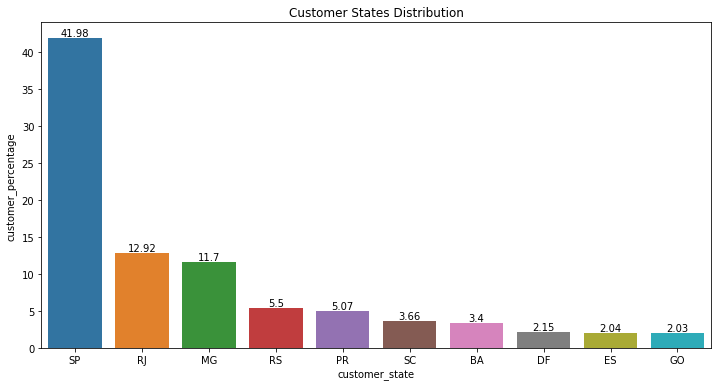

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'customer_state', y = 'customer_percentage', data = df[:10])
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Customer States Distribution", fontsize = 12)
plt.show()


Around 42 Percent of Total customers belongs to SP State alone. Then RJ states have around 13 percent of customers

RR has least number of
customers 46

**Recommendation-**

SP State has a lot of customers so the company should focus on this state to retain
and add more customers. RR State has the least number of customers so scrutinizing should be done why such low numbers and do something to improve this number

In [ ]:
%%bigquery --project target-365214 df1
SELECT
  customer_city,
  COUNT(*) AS total_customers,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS customer_percentageCityWise
FROM
  Target_Data.customers AS customer_count
GROUP BY
  customer_city
ORDER BY
  COUNT(*) DESC

In [ ]:
df1.head()

,customer_city,total_customers,customer_percentageCityWise
0,sao paulo,15540,15.63
1,rio de janeiro,6882,6.92
2,belo horizonte,2773,2.79
3,brasilia,2131,2.14
4,curitiba,1521,1.53


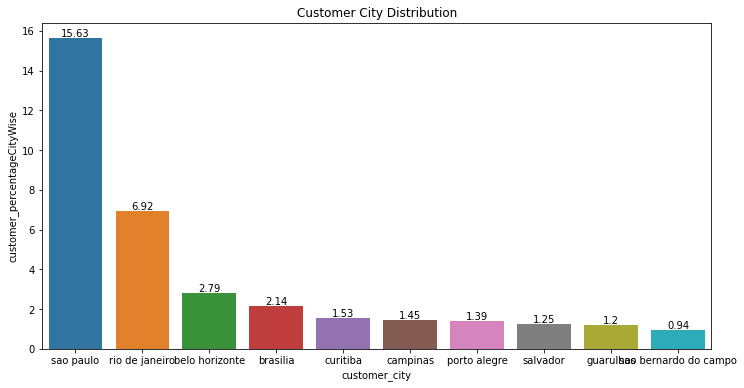

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'customer_city', y = 'customer_percentageCityWise', data = df1[:10])
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Customer City Distribution", fontsize = 12)
plt.show()

Around 15.63 % of customers belongs to Sao Paulo City, 6.92 % belings to RIO de Janeiro city

**Recommendation-**

Sao Paulo and Rio de Janeiro should be main focus to increase customer
retention as these two cities have maximum number of customers.


In [ ]:
%%bigquery --project target-365214 df2
SELECT
  seller_state,
  COUNT(*) AS total_sellers,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS seller_percentageStateWise
FROM
  Target_Data.sellers AS seller_count
GROUP BY
  seller_state
ORDER BY
  COUNT(*) DESC

In [ ]:
df2.head()

,seller_state,total_sellers,seller_percentageStateWise
0,SP,1849,59.74
1,PR,349,11.28
2,MG,244,7.88
3,SC,190,6.14
4,RJ,171,5.53


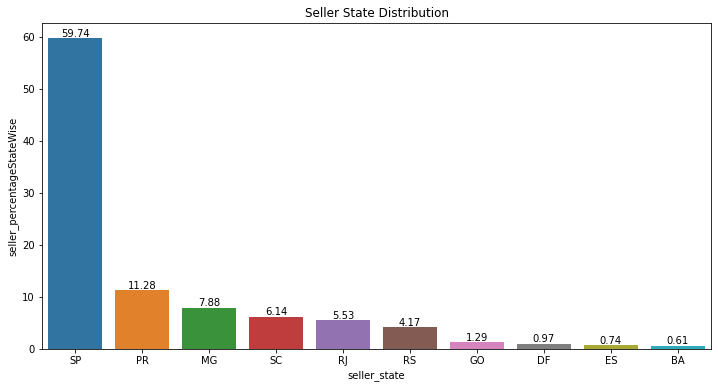

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'seller_state', y = 'seller_percentageStateWise', data = df2[:10])
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Seller State Distribution", fontsize = 12)
plt.show()

Around 59 Percent of Total sellers belongs to State SP and 11 percent of sellers are from Sate PR

In [ ]:
%%bigquery --project target-365214 df3
SELECT
  seller_city,
  COUNT(*) AS total_sellers,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS seller_percentageCityWise
FROM
  Target_Data.sellers AS seller_count
GROUP BY
  seller_city
ORDER BY
  COUNT(*) DESC

In [ ]:
df3.head()

,seller_city,total_sellers,seller_percentageCityWise
0,sao paulo,694,22.42
1,curitiba,127,4.10
2,rio de janeiro,96,3.10
3,belo horizonte,68,2.20
4,ribeirao preto,52,1.68


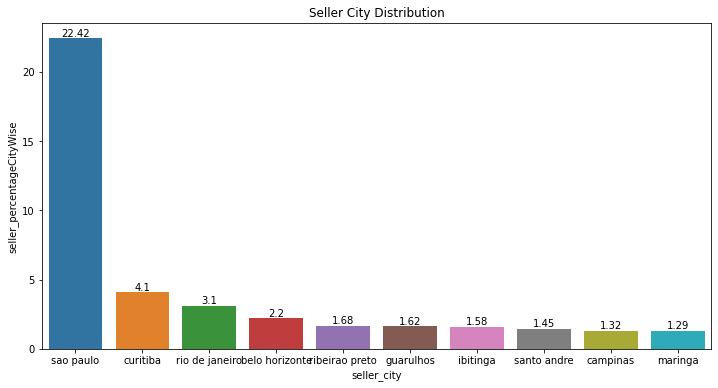

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'seller_city', y = 'seller_percentageCityWise', data = df3[:10])
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Seller City Distribution", fontsize = 12)
plt.show()

Around 22 percent of sellers are from Sao Paulo city and 4 percent are from curitiba city

2.	**In-depth Exploration:**

In [ ]:
%%bigquery --project target-365214
CREATE VIEW
  Target_Data.CustomerPurchaseView AS(
  SELECT
    order_id,
    customer_id,
    order_purchase_timestamp,
    EXTRACT(YEAR
    FROM
      order_purchase_timestamp) AS purchaseYear,
    EXTRACT(MONTH
    FROM
      order_purchase_timestamp) AS purchaseMonth,
    FORMAT_DATE("%A", order_purchase_timestamp) AS puechaseDayOfWeek,
    EXTRACT(WEEK
    FROM
      order_purchase_timestamp) AS purchaseWeek,
    order_delivered_customer_date,
    order_estimated_delivery_date
  FROM
    `Target_Data.orders` )

In [ ]:
%%bigquery --project target-365214 d
select * from Target_Data.CustomerPurchaseView

In [ ]:
d.head()

,order_id,customer_id,order_purchase_timestamp,purchaseYear,purchaseMonth,puechaseDayOfWeek,purchaseWeek,order_delivered_customer_date,order_estimated_delivery_date
0,db640157e1dcec75f26ab07653111cf2,3cc066496f34fb2db4ab8dc3b4fbec68,2017-12-31 10:42:54+00:00,2017,12,Sunday,53,NaT,2018-01-24 00:00:00+00:00
1,e724300bcd73fb1c467b1c20c33a1fdd,69857264f035b854f64d217daf71d08a,2017-12-31 15:16:07+00:00,2017,12,Sunday,53,NaT,2018-02-05 00:00:00+00:00
2,ee38b45af2d4e705a88a37af7f0cda97,bbaecf87a9363029f2406448dd098b16,2017-12-31 12:12:02+00:00,2017,12,Sunday,53,NaT,2018-01-18 00:00:00+00:00
3,2650915aaf92c36da9a8f87debb7bb59,afe5ae8335a79b230d244dc3b8cf2f53,2017-12-31 11:31:58+00:00,2017,12,Sunday,53,2018-01-16 17:46:06+00:00,2018-02-06 00:00:00+00:00
4,35153d02b70cad4eb36cc178280458ed,355ab104e51f1c3c84e6b1220f5200e7,2017-12-31 02:36:16+00:00,2017,12,Sunday,53,2018-01-11 22:39:00+00:00,2018-02-06 00:00:00+00:00


1.	Is there a growing trend on e-commerce in Brazil? How can we describe a complete scenario? Can we see some seasonality with peaks at specific months?

In [ ]:
%%bigquery --project target-365214 PurchaseAnalysis
SELECT
  *,
  SUM(ordersPerMonth) OVER(PARTITION BY purchaseQuarter ORDER BY purchaseMonth ASC ROWS BETWEEN UNBOUNDED PRECEDING AND 0 FOLLOWING) AS runningOrdersPerQuarter,
  SUM(ordersPerMonth) OVER(PARTITION BY purchaseQuarter ORDER BY purchaseQuarter ASC) AS ordersPerQuarter
FROM (
  SELECT
    purchaseMonth,
    COUNT(order_id) AS ordersPerMonth,
    NTILE(4) OVER(ORDER BY purchaseMonth ASC) AS purchaseQuarter
  FROM
    `Target_Data.CustomerPurchaseView`
  GROUP BY
    purchaseMonth) AS x
ORDER BY
  purchaseMonth

In [ ]:
PurchaseAnalysis

,purchaseMonth,ordersPerMonth,purchaseQuarter,runningOrdersPerQuarter,ordersPerQuarter
0,1,8069,1,8069,26470
1,2,8508,1,16577,26470
2,3,9893,1,26470,26470
3,4,9343,2,9343,29328
4,5,10573,2,19916,29328
5,6,9412,2,29328,29328
6,7,10318,3,10318,25466
7,8,10843,3,21161,25466
8,9,4305,3,25466,25466
9,10,4959,4,4959,18177


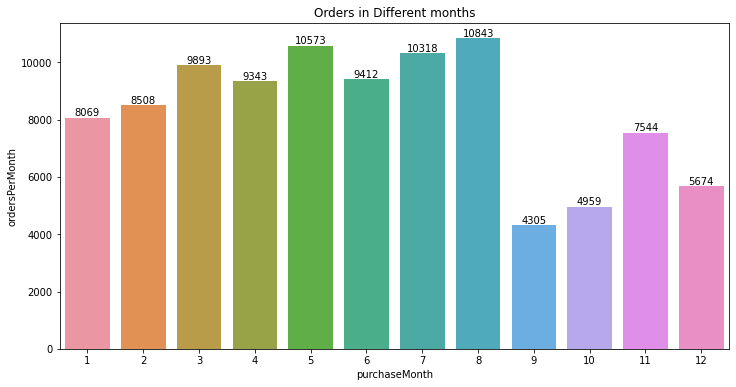

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'purchaseMonth', y = 'ordersPerMonth', data = PurchaseAnalysis)
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Orders in Different months", fontsize = 12)
plt.show()

Here we can see that Highest number of orders in the month of August, June, July but after that in the month of septembers order count is very less.

In the last 4 months September, October, November and December Number of Orders decresed as compared to other months

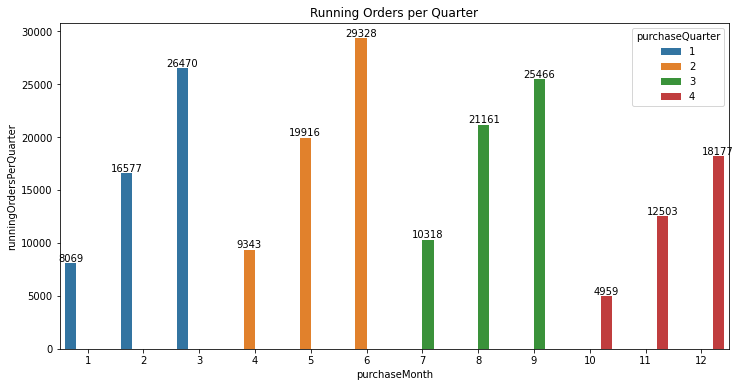

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'purchaseMonth', y = 'runningOrdersPerQuarter', data = PurchaseAnalysis, hue = 'purchaseQuarter')
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Running Orders per Quarter", fontsize = 12)
plt.show()

In the second Quarter there are highest number of orders 29328, in the first quarter it is 26470 in the third quarter 25446 but in the fourth i.e., lat quarter it is only 18177

In [ ]:
%%bigquery --project target-365214 PurchaseAnalysisYearly
SELECT
  *,
  round((ordersPerYear - prevYearOrders)/prevYearOrders *100 , 2)AS percentage_change
FROM (
  SELECT
    purchaseYear,
    COUNT(order_id) AS ordersPerYear,
    LAG(COUNT(order_id)) OVER(ORDER BY COUNT(order_id)) AS prevYearOrders
  FROM
    `target-365214.Target_Data.CustomerPurchaseView`
  GROUP BY
    purchaseYear
  ORDER BY
    purchaseYear) AS x;

In [ ]:
PurchaseAnalysisYearly

,purchaseYear,ordersPerYear,prevYearOrders,percentage_change
0,2016,329,NaN,NaN
1,2017,45101,329.0,13608.51
2,2018,54011,45101.0,19.76


As visible, e-commerce trend in Brazil is growing yearly. From 2017 to 2018 there
was an increase of 19.76 % in number of orders

**Recommendation**

As e-commerce trend is growing yearly in the Brazil, company can make plans
how to get the most benefit out of it

In [ ]:
%%bigquery --project target-365214 PurchaseMonthsForYear2016
SELECT
  DISTINCT purchaseMonth
FROM
  `Target_Data.CustomerPurchaseView`
WHERE
  purchaseYear = 2016
ORDER BY
  purchaseMonth

In [ ]:
PurchaseMonthsForYear2016

,purchaseMonth
0,9
1,10
2,12


As there are only 3 months considered from year 2016 let's ignore it



In [ ]:
%%bigquery --project target-365214 PurchaseAnalysisYearly
SELECT
  *,
  ROUND((ordersPerYear - prevYearOrders)/prevYearOrders *100, 2)AS percentage_change
FROM (
  SELECT
    purchaseYear,
    COUNT(order_id) AS ordersPerYear,
    LAG(COUNT(order_id)) OVER(ORDER BY COUNT(order_id)) AS prevYearOrders
  FROM
    `target-365214.Target_Data.CustomerPurchaseView`
  WHERE
    purchaseYear != 2016
  GROUP BY
    purchaseYear
  ORDER BY
    purchaseYear) AS x;

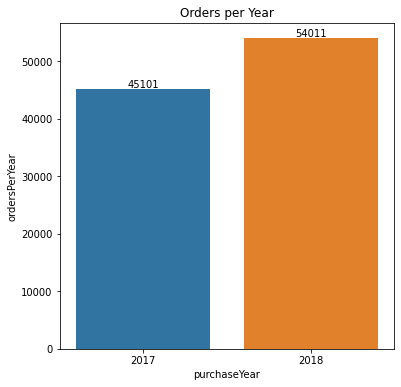

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x = 'purchaseYear', y = 'ordersPerYear', data = PurchaseAnalysisYearly)
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Orders per Year", fontsize = 12)
plt.show()

2.	What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)?

In [ ]:
%%bigquery --project target-365214 OrdersPerPartOfDay
SELECT
  part_of_day,
  COUNT(*) as NumOfOrders,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage
FROM (
  SELECT
    *,
    TIME(order_purchase_timestamp) AS time_of_day,
    CASE
      WHEN TIME(order_purchase_timestamp) >= TIME(00,00,00) AND TIME(order_purchase_timestamp) < TIME(5,00,00) THEN "dawn_time"
      WHEN TIME(order_purchase_timestamp) >= TIME(5,00,00)
    AND TIME(order_purchase_timestamp) < TIME(12,00,00) THEN "morning_time"
      WHEN TIME(order_purchase_timestamp) >= TIME(12,00,00) AND TIME(order_purchase_timestamp) < TIME(17,00,00) THEN "afternoon_time"
      WHEN TIME(order_purchase_timestamp) >= TIME(17,00,00)
    AND TIME(order_purchase_timestamp) <= TIME(23,59,59) THEN "night_time"
    ELSE
    "other_time"
  END
    AS part_of_day
  FROM
    `Target_Data.CustomerPurchaseView`) AS x
GROUP BY
  part_of_day
ORDER BY
  NumOfOrders

In [ ]:
OrdersPerPartOfDay

,part_of_day,NumOfOrders,percentage
0,dawn_time,4552,4.58
1,morning_time,22428,22.55
2,afternoon_time,32211,32.39
3,night_time,40250,40.48


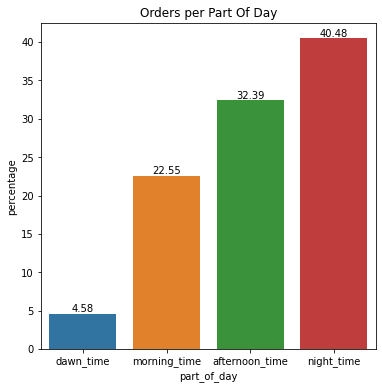

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x = 'part_of_day', y = 'percentage', data = OrdersPerPartOfDay)
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Orders per Part Of Day", fontsize = 12)
plt.show()

It is evident that most Brazilian customers order at night time and least
customers order at dawn time.

**Recommendation-**

As most customers buy during night time, more ad campaigns, staff and other
resources should be deployed at that time to enhance user experience.


**3.	Evolution of E-commerce orders in the Brazil region:**

1.	Get month on month orders by region, states

In [ ]:
%%bigquery --project target-365214 OrdersPerMonthPerState
SELECT
  customer_state,
  purchaseMonth,
  COUNT(*) as NumOfOrders,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage
FROM
  `Target_Data.CustomerPurchaseView` AS CP
JOIN
  `Target_Data.customers` AS C
ON
  CP.customer_id = C.customer_id
GROUP BY
  customer_state,
  purchaseMonth
ORDER BY
  NumOfOrders DESC

In [ ]:
OrdersPerMonthPerState.head(10)

,customer_state,purchaseMonth,NumOfOrders,percentage
0,SP,8,4982,5.01
1,SP,5,4632,4.66
2,SP,7,4381,4.41
3,SP,6,4104,4.13
4,SP,3,4047,4.07
5,SP,4,3967,3.99
6,SP,2,3357,3.38
7,SP,1,3351,3.37
8,SP,11,3012,3.03
9,SP,12,2357,2.37


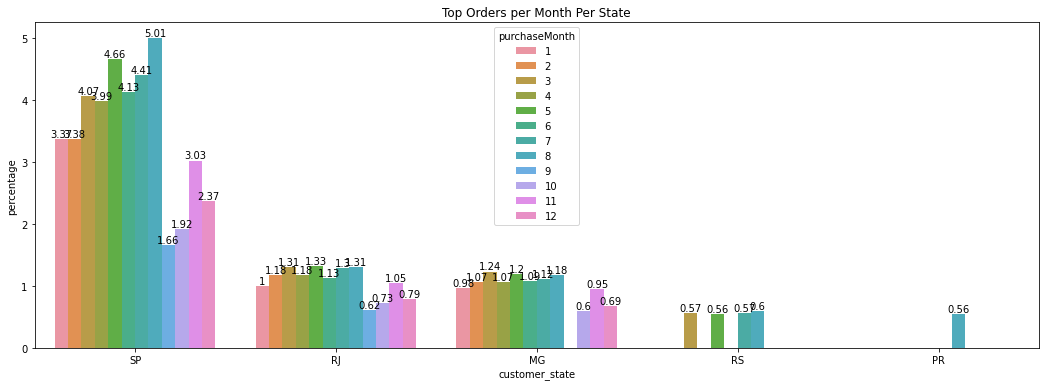

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x = 'customer_state', y = 'percentage', data = OrdersPerMonthPerState[:40], hue = "purchaseMonth" )
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Top Orders per Month Per State", fontsize = 12)
plt.show()

SP State has highest number of orders almost evry month then RJ State and then State MG.


**Recommendation-**

Customer should do various campaigns to focus in this cities and increase number of customers and orders from SP, RJ, MG states as they are states providing buisness

In [ ]:
%%bigquery --project target-365214 OrdersPerMonthPerCity
SELECT
  customer_city,
  purchaseMonth,
  COUNT(*) AS NumOfOrders,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage
FROM
  `Target_Data.CustomerPurchaseView` AS CP
JOIN
  `Target_Data.customers` AS C
ON
  CP.customer_id = C.customer_id
GROUP BY
  customer_city,
  purchaseMonth
ORDER BY
  NumOfOrders DESC

In [ ]:
OrdersPerMonthPerCity.head(10)

,customer_city,purchaseMonth,NumOfOrders,percentage
0,sao paulo,8,1954,1.96
1,sao paulo,5,1743,1.75
2,sao paulo,7,1625,1.63
3,sao paulo,3,1533,1.54
4,sao paulo,6,1532,1.54
5,sao paulo,4,1467,1.48
6,sao paulo,2,1272,1.28
7,sao paulo,1,1195,1.20
8,sao paulo,11,1118,1.12
9,sao paulo,12,840,0.84


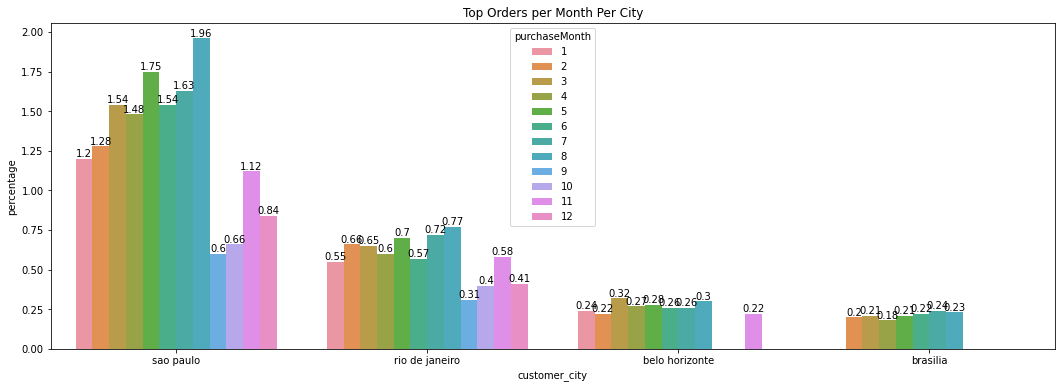

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x = 'customer_city', y = 'percentage', data = OrdersPerMonthPerCity[:40], hue = "purchaseMonth" )
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Top Orders per Month Per City", fontsize = 12)
plt.show()

sao paulo city has highest number of orders almost evry month

In [ ]:
%%bigquery --project target-365214 OrdersPerYearPerState
SELECT
  customer_state,
  purchaseYear,
  COUNT(*) AS NumOfOrders,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage
FROM
  `Target_Data.CustomerPurchaseView` AS CP
JOIN
  `Target_Data.customers` AS C
ON
  CP.customer_id = C.customer_id
GROUP BY
  customer_state,
  purchaseYear
ORDER BY
  NumOfOrders DESC

In [ ]:
OrdersPerYearPerState.head(10)

,customer_state,purchaseYear,NumOfOrders,percentage
0,SP,2018,23871,24.01
1,SP,2017,17760,17.86
2,RJ,2018,6571,6.61
3,RJ,2017,6225,6.26
4,MG,2018,6181,6.22
5,MG,2017,5414,5.44
6,RS,2018,2780,2.80
7,PR,2018,2755,2.77
8,RS,2017,2661,2.68
9,PR,2017,2270,2.28


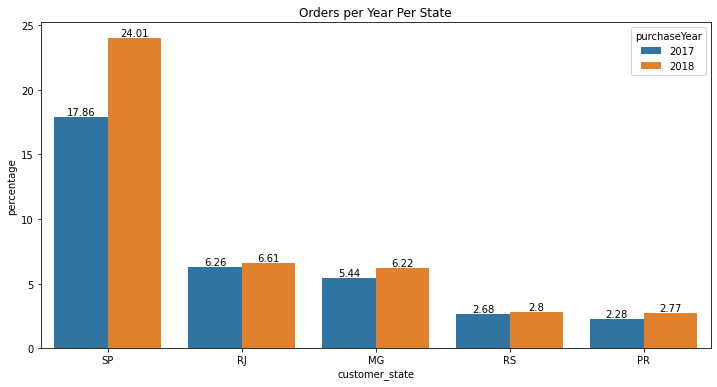

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'customer_state', y = 'percentage', data = OrdersPerYearPerState[:10], hue = "purchaseYear" )
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Orders per Year Per State", fontsize = 12)
plt.show()

Orders increased in all the top 5 states over the year, but SP state increased it very dominantly by almost 7 percent

In [ ]:
%%bigquery --project target-365214 OrdersPerYearPerCity
SELECT
  customer_city,
  purchaseYear,
  COUNT(*) AS NumOfOrders,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage
FROM
  `Target_Data.CustomerPurchaseView` AS CP
JOIN
  `Target_Data.customers` AS C
ON
  CP.customer_id = C.customer_id
GROUP BY
  customer_city,
  purchaseYear
ORDER BY
  NumOfOrders DESC

In [ ]:
OrdersPerYearPerCity.head(10)

,customer_city,purchaseYear,NumOfOrders,percentage
0,sao paulo,2018,9123,9.17
1,sao paulo,2017,6381,6.42
2,rio de janeiro,2018,3503,3.52
3,rio de janeiro,2017,3341,3.36
4,belo horizonte,2018,1555,1.56
5,brasilia,2018,1213,1.22
6,belo horizonte,2017,1206,1.21
7,brasilia,2017,912,0.92
8,curitiba,2018,864,0.87
9,campinas,2018,819,0.82


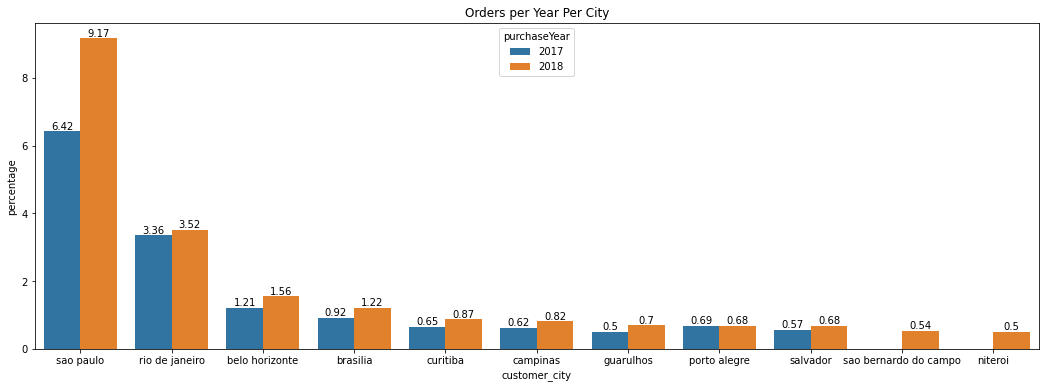

In [ ]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x = 'customer_city', y = 'percentage', data = OrdersPerYearPerCity[:20], hue = "purchaseYear")
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Orders per Year Per City", fontsize = 12)
plt.show()

2.	How are customers distributed in Brazil

In [ ]:
%%bigquery --project target-365214 CustomersPerState
SELECT
  customer_state,
  COUNT(*) AS num_customers,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage_of_customers
FROM
  `Target_Data.customers`
GROUP BY
  customer_state
ORDER BY
  COUNT(*) DESC

In [ ]:
CustomersPerState.head(5)

,customer_state,num_customers,percentage_of_customers
0,SP,41746,41.98
1,RJ,12852,12.92
2,MG,11635,11.70
3,RS,5466,5.50
4,PR,5045,5.07


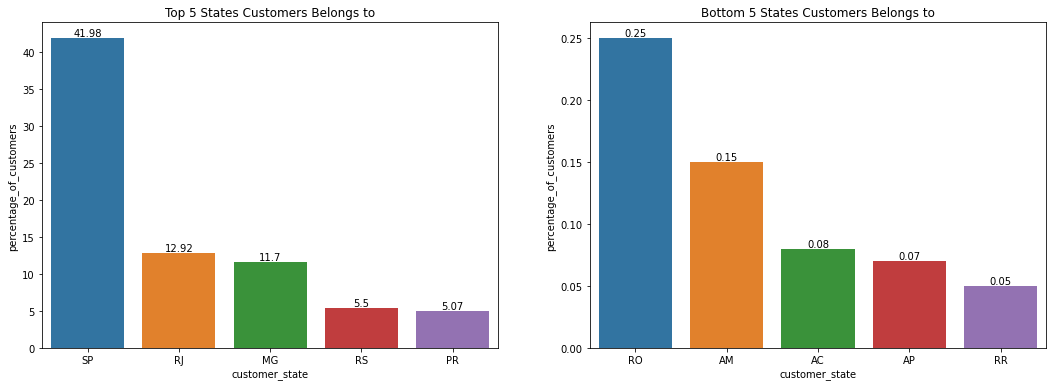

<Figure size 1296x432 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6), squeeze=False)
plt.figure(figsize=(18,6))
g1 = sns.barplot(x = 'customer_state', y = 'percentage_of_customers', data = CustomersPerState[:5], ax = axs[0, 0])
for i in g1.containers:
  g1.bar_label(i,)
g1.set_title("Top 5 States Customers Belongs to", fontsize = 12)
g2 = sns.barplot(x = 'customer_state', y = 'percentage_of_customers', data = CustomersPerState.tail(5), ax = axs[0, 1])
for i in g2.containers:
  g2.bar_label(i,)
g2.set_title("Bottom 5 States Customers Belongs to", fontsize = 12)
plt.show()

**Top 5 States in consideration of number of customers are:**
1. SP 41.98 % of Total customers
2. RJ 12.92 % customers
3. MG 11.7 % Customers
4. RS 5.5 % Customers
5. PR 5.07% customers

**Bottom 5 States in consideration of number of customers are:**
1. RR 0.05 % of Total customers
2. AP 0.07 % customers
3. AC 0.08 % Customers
4. AM 0.15 % Customers
5. RO 0.25% customers


In [ ]:
%%bigquery --project target-365214 CustomersPerCity
SELECT
  customer_city,
  COUNT(*) AS num_customers,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage_of_customers
FROM
  `Target_Data.customers`
GROUP BY
  customer_city
ORDER BY
  COUNT(*) DESC

In [ ]:
CustomersPerCity.head()

,customer_city,num_customers,percentage_of_customers
0,sao paulo,15540,15.63
1,rio de janeiro,6882,6.92
2,belo horizonte,2773,2.79
3,brasilia,2131,2.14
4,curitiba,1521,1.53


In [ ]:
CustomersPerCity.tail()

,customer_city,num_customers,percentage_of_customers
4114,pontes gestal,1,0.0
4115,tiradentes do sul,1,0.0
4116,conceicao do almeida,1,0.0
4117,santa cecilia do pavao,1,0.0
4118,santa quiteria do maranhao,1,0.0


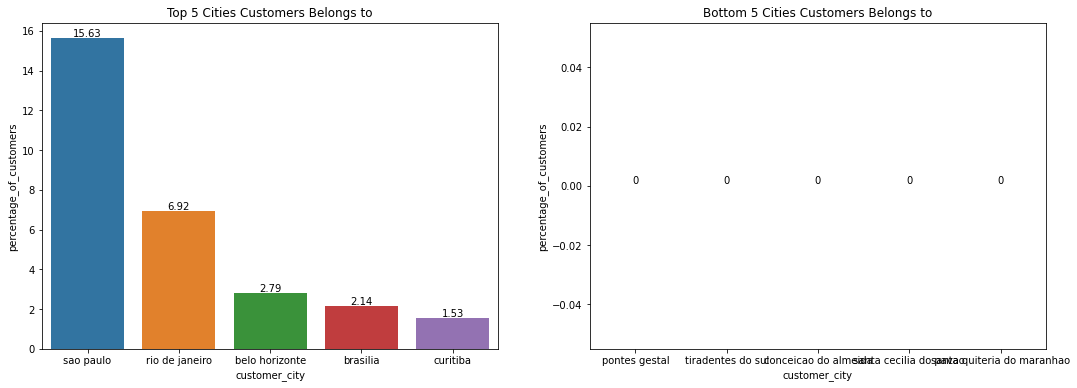

<Figure size 1296x432 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6), squeeze=False)
plt.figure(figsize=(18,6))
g1 = sns.barplot(x = 'customer_city', y = 'percentage_of_customers', data = CustomersPerCity[:5], ax = axs[0, 0])
for i in g1.containers:
  g1.bar_label(i,)
g1.set_title("Top 5 Cities Customers Belongs to", fontsize = 12)
g2 = sns.barplot(x = 'customer_city', y = 'percentage_of_customers', data = CustomersPerCity.tail(5), ax = axs[0, 1])
for i in g2.containers:
  g2.bar_label(i,)
g2.set_title("Bottom 5 Cities Customers Belongs to", fontsize = 12)
plt.show()

Top 5 Cities in consideration of number of customers are:

1. sao paulo 15.63 % of Total customers
2. rio de janerio 6.92 % customers
3. belo horizonte customer_city 2.79 % Customers
4. brasillia 2.14 % Customers
5. curitiba 1.53% customers

**4.	Impact on Economy: Analyze the money movemented by e-commerce by looking at order prices, freight and others**

1.	Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)

In [ ]:
%%bigquery --project target-365214 CostOfOrder20172018
SELECT
  *,
  LAG(x.total_cost) OVER(ORDER BY x.total_cost) AS prev_year_cost,
  ROUND(( (x.total_cost - LAG(x.total_cost) OVER(ORDER BY x.total_cost))/LAG(x.total_cost) OVER(ORDER BY x.total_cost) * 100),2) AS percentage_increase
FROM (
  SELECT
    CI.purchaseYear,
    ROUND(SUM(price),2) AS total_price,
    ROUND(SUM(freight_value),2) AS total_freight,
    ROUND(SUM(price)+SUM(freight_value), 2) AS total_cost
  FROM
    `Target_Data.CustomerPurchaseView` AS CI
  JOIN
    `Target_Data.order_items` AS OI
  ON
    CI.order_id = OI.order_id
  WHERE
    CI.purchaseMonth BETWEEN 1
    AND 8
  GROUP BY
    CI.purchaseYear ) AS x;

In [ ]:
CostOfOrder20172018

,purchaseYear,total_price,total_freight,total_cost,prev_year_cost,percentage_increase
0,2017,3113000.32,497269.83,3610270.15,NaN,NaN
1,2018,7385905.80,1257625.34,8643531.14,3610270.15,139.42


From 2017 to 2018, Total cost has been increased by 139%, which is a drastic
increase in a year


**Recommendation**

Company should try to reduce costs as such increase in costs in not sustainable
for a long time.

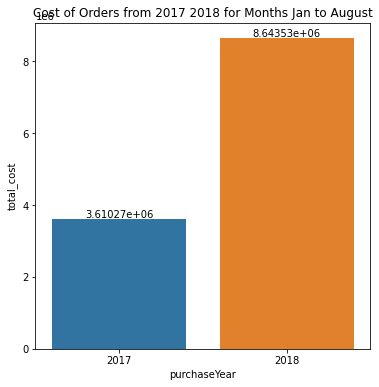

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x = 'purchaseYear', y = 'total_cost', data = CostOfOrder20172018)
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Cost of Orders from 2017 2018 for Months Jan to August", fontsize = 12)
plt.show()

2.	Mean & Sum of price and freight value by customer state

In [ ]:
%%bigquery --project target-365214 PriceFreightValuePerCustomerState
SELECT
  C.customer_state,
  ROUND(SUM(OI.price),2) AS total_price,
  ROUND(AVG(OI.price),2) AS mean_price,
  ROUND(SUM(OI.freight_value),2) AS total_freight_value,
  ROUND(AVG(OI.freight_value),2) AS mean_freight_value
FROM
  `Target_Data.customers` AS C
JOIN
  `Target_Data.orders` AS O
ON
  C.customer_id = O.customer_id
JOIN
  `Target_Data.order_items` AS OI
ON
  O.order_id = OI.order_id
GROUP BY
  C.customer_state
ORDER BY
  total_price DESC

In [ ]:
PriceFreightValuePerCustomerState.head(10)

,customer_state,total_price,mean_price,total_freight_value,mean_freight_value
0,SP,5202955.05,109.65,718723.07,15.15
1,RJ,1824092.67,125.12,305589.31,20.96
2,MG,1585308.03,120.75,270853.46,20.63
3,RS,750304.02,120.34,135522.74,21.74
4,PR,683083.76,119.00,117851.68,20.53
5,SC,520553.34,124.65,89660.26,21.47
6,BA,511349.99,134.60,100156.68,26.36
7,DF,302603.94,125.77,50625.50,21.04
8,GO,294591.95,126.27,53114.98,22.77
9,ES,275037.31,121.91,49764.60,22.06


Mean freight value is maximum, 42.98 in RR State and it is minimum, 22.77 in GO
State

Also, Mean Price 126.27 is minimum in GO State and is 191.48, maximum in PB
State

**Recommendation**

Company should try to find ways to decrease freight values in RR state

In [ ]:
PriceFreightValuePerCustomerState

,customer_state,total_price,mean_price,total_freight_value,mean_freight_value
0,SP,5202955.05,109.65,718723.07,15.15
1,RJ,1824092.67,125.12,305589.31,20.96
2,MG,1585308.03,120.75,270853.46,20.63
3,RS,750304.02,120.34,135522.74,21.74
4,PR,683083.76,119.00,117851.68,20.53
5,SC,520553.34,124.65,89660.26,21.47
6,BA,511349.99,134.60,100156.68,26.36
7,DF,302603.94,125.77,50625.50,21.04
8,GO,294591.95,126.27,53114.98,22.77
9,ES,275037.31,121.91,49764.60,22.06


<AxesSubplot:xlabel='customer_state'>

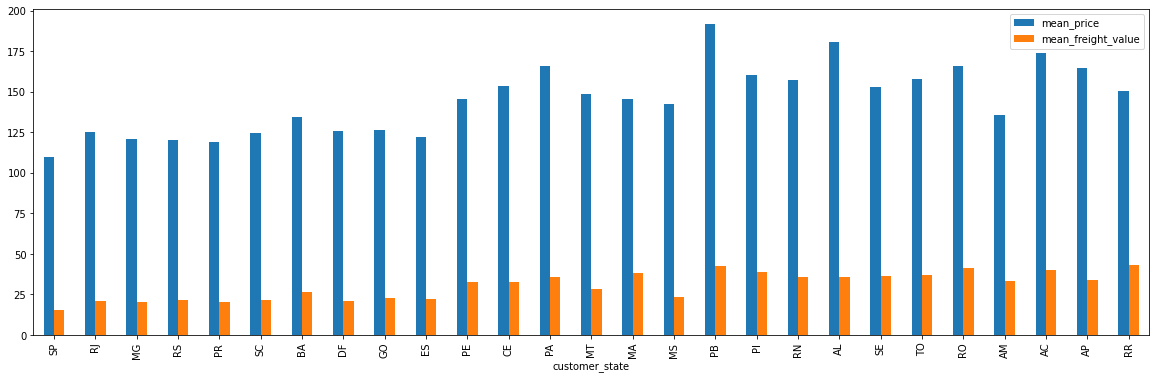

In [ ]:
PriceFreightValuePerCustomerState.plot(x="customer_state", y=["mean_price", "mean_freight_value"],kind="bar", figsize=(20, 6))

**5.	Analysis on sales, freight and delivery time**

1.	Calculate days between purchasing, delivering and estimated delivery

In [ ]:
%%bigquery --project target-365214 TimeToDeliveryAndEstmatedDelivery
SELECT
  order_id,
  customer_id,
  order_purchase_timestamp,
  order_delivered_customer_date,
  order_estimated_delivery_date,
  TIMESTAMP_DIFF(order_delivered_customer_date , order_purchase_timestamp, DAY) AS time_to_delivery,
  TIMESTAMP_DIFF(order_estimated_delivery_date, order_purchase_timestamp, DAY) AS estimate_to_deliver
FROM
  `Target_Data.CustomerPurchaseView`

ORDER BY
time_to_delivery  DESC

In [ ]:
TimeToDeliveryAndEstmatedDelivery.head(10)

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,time_to_delivery,estimate_to_deliver
0,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,2017-02-21 23:31:27+00:00,2017-09-19 14:36:39+00:00,2017-03-22 00:00:00+00:00,209.0,28
1,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,2018-02-23 14:57:35+00:00,2018-09-19 23:24:07+00:00,2018-03-15 00:00:00+00:00,208.0,19
2,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,2017-03-07 23:59:51+00:00,2017-09-19 15:12:50+00:00,2017-04-07 00:00:00+00:00,195.0,30
3,0f4519c5f1c541ddec9f21b3bddd533a,1a8a4a30dc296976717f44e7801fdeef,2017-03-09 13:26:57+00:00,2017-09-19 14:38:21+00:00,2017-04-11 00:00:00+00:00,194.0,32
4,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,2017-03-08 22:47:40+00:00,2017-09-19 14:00:04+00:00,2017-04-06 00:00:00+00:00,194.0,28
5,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,2017-03-08 18:09:02+00:00,2017-09-19 14:33:17+00:00,2017-04-17 00:00:00+00:00,194.0,39
6,47b40429ed8cce3aee9199792275433f,cb2caaaead400c97350c37a3fc536867,2018-01-03 09:44:01+00:00,2018-07-13 20:51:31+00:00,2018-01-19 00:00:00+00:00,191.0,15
7,2fe324febf907e3ea3f2aa9650869fa5,65b14237885b3972ebec28c0f7dd2220,2017-03-13 20:17:10+00:00,2017-09-19 17:00:07+00:00,2017-04-05 00:00:00+00:00,189.0,22
8,2d7561026d542c8dbd8f0daeadf67a43,8199345f57c6d1cbe9701f92481beb8d,2017-03-15 11:24:27+00:00,2017-09-19 14:38:18+00:00,2017-04-13 00:00:00+00:00,188.0,28
9,437222e3fd1b07396f1d9ba8c15fba59,9b39de85d94d55a21991e70b04305d6e,2017-03-16 11:36:00+00:00,2017-09-19 16:28:58+00:00,2017-04-28 00:00:00+00:00,187.0,42


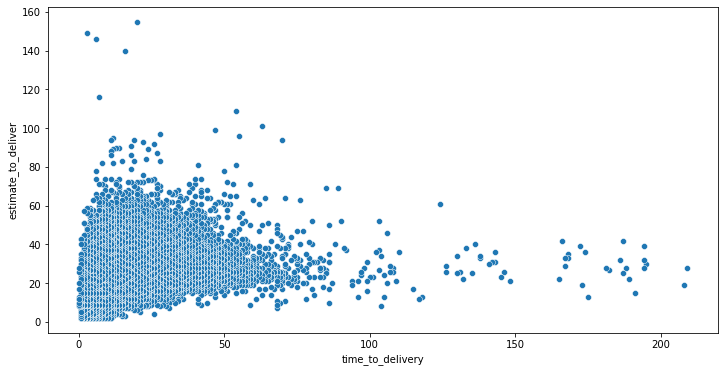

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x = "time_to_delivery", y = "estimate_to_deliver", data = TimeToDeliveryAndEstmatedDelivery)
plt.show()

Mean time to delivery 28.22 is maximum for AP state and 8.66 is minimum for SP
state.

Mean freight value is maximum 42.98 for RR and 15.14 is minimum for SP state.

Mean of difference in estimated delivery time 8.73 is minimum for AL state and
20.97 is maximum for AC state.

2.	Create columns:

a.	time_to_delivery = order_purchase_timestamp-order_delivered_customer_date

b.	diff_estimated_delivery = order_estimated_delivery_date-order_delivered_customer_date

In [ ]:
%%bigquery --project target-365214 CreateColtimeToDelAndFDiffEstimatedDel
SELECT
  order_id,
  order_purchase_timestamp,
  order_delivered_customer_date,
  order_estimated_delivery_date,
  TIMESTAMP_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS time_to_delivery,
  TIMESTAMP_DIFF(order_estimated_delivery_date, order_delivered_customer_date, DAY) AS diff_estimated_delivery
FROM
  `Target_Data.CustomerPurchaseView`;

In [ ]:
CreateColtimeToDelAndFDiffEstimatedDel.head()

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,time_to_delivery,diff_estimated_delivery
0,1950d777989f6a877539f53795b4c3c3,2018-02-19 19:48:52+00:00,2018-03-21 22:03:51+00:00,2018-03-09 00:00:00+00:00,30.0,-12.0
1,2c45c33d2f9cb8ff8b1c86cc28c11c30,2016-10-09 15:39:56+00:00,2016-11-09 14:53:50+00:00,2016-12-08 00:00:00+00:00,30.0,28.0
2,65d1e226dfaeb8cdc42f665422522d14,2016-10-03 21:01:41+00:00,2016-11-08 10:58:34+00:00,2016-11-25 00:00:00+00:00,35.0,16.0
3,635c894d068ac37e6e03dc54eccb6189,2017-04-15 15:37:38+00:00,2017-05-16 14:49:55+00:00,2017-05-18 00:00:00+00:00,30.0,1.0
4,3b97562c3aee8bdedcb5c2e45a50d5e1,2017-04-14 22:21:54+00:00,2017-05-17 10:52:15+00:00,2017-05-18 00:00:00+00:00,32.0,0.0


3.	Group data by state, take mean of freight_value, time_to_delivery, diff_estimated_delivery

In [ ]:
%%bigquery --project target-365214 data1
SELECT
  x.customer_state,
  ROUND(AVG(x.freight_value), 2) AS avg_freight_value,
  ROUND(AVG(x.time_to_delivery), 2) AS avg_time_to_delivery,
  ROUND(AVG(x.diff_estimated_delivery), 2) AS avg_diff_estimated_delivery
FROM (
  SELECT
    C.customer_state,
    OI.freight_value,
    TIMESTAMP_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS time_to_delivery,
    TIMESTAMP_DIFF(order_estimated_delivery_date, order_delivered_customer_date, DAY) AS diff_estimated_delivery
  FROM
    `Target_Data.CustomerPurchaseView` AS CP
  JOIN
    `Target_Data.order_items` AS OI
  ON
    CP.order_id = OI.order_id
  JOIN
    `Target_Data.customers` AS C
  ON
    CP.customer_id = C.customer_id ) AS x
GROUP BY
  x.customer_state;

In [ ]:
data1.head(10)

,customer_state,avg_freight_value,avg_time_to_delivery,avg_diff_estimated_delivery
0,MT,28.17,17.51,13.64
1,MA,38.26,21.20,9.11
2,AL,35.84,23.99,7.98
3,SP,15.15,8.26,10.27
4,MG,20.63,11.52,12.40
5,PE,32.92,17.79,12.55
6,RJ,20.96,14.69,11.14
7,DF,21.04,12.50,11.27
8,RS,21.74,14.71,13.20
9,SE,36.65,20.98,9.17


Mean time to delivery 28.22 is maximum for AP state and 8.66 is minimum for SP
state.

Mean freight value is maximum 42.98 for RR and 15.14 is minimum for SP state.

Mean of difference in estimated delivery time 8.73 is minimum for AL state and
20.97 is maximum for AC state.

**4.	Sort the data to get the following**

1. Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5

In [ ]:
%%bigquery --project target-365214 Lowest5AvgFreightStates
SELECT
  x.customer_state,
  ROUND(AVG(x.freight_value), 2)AS avg_freight_value
FROM (
  SELECT
    C.customer_state,
    OI.freight_value,
    DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS time_to_delivery,
    DATE_DIFF(order_estimated_delivery_date, order_delivered_customer_date, DAY) AS diff_estimated_delivery
  FROM
    `Target_Data.CustomerPurchaseView` AS CP
  JOIN
    `Target_Data.order_items` AS OI
  ON
    CP.order_id = OI.order_id
  JOIN
    `Target_Data.customers` AS C
  ON
    CP.customer_id = C.customer_id ) AS x
GROUP BY
  x.customer_state
ORDER BY
  AVG(x.freight_value)
LIMIT
  5

In [ ]:
Lowest5AvgFreightStates

,customer_state,avg_freight_value
0,SP,15.15
1,PR,20.53
2,MG,20.63
3,RJ,20.96
4,DF,21.04


In [ ]:
%%bigquery --project target-365214 Top5AvgFreightStates
SELECT
  x.customer_state,
  ROUND(AVG(x.freight_value), 2)AS avg_freight_value
FROM (
  SELECT
    C.customer_state,
    OI.freight_value,
    DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS time_to_delivery,
    DATE_DIFF(order_estimated_delivery_date, order_delivered_customer_date, DAY) AS diff_estimated_delivery
  FROM
    `Target_Data.CustomerPurchaseView` AS CP
  JOIN
    `Target_Data.order_items` AS OI
  ON
    CP.order_id = OI.order_id
  JOIN
    `Target_Data.customers` AS C
  ON
    CP.customer_id = C.customer_id ) AS x
GROUP BY
  x.customer_state
ORDER BY
  AVG(x.freight_value) DESC
LIMIT
  5

In [ ]:
Top5AvgFreightStates

,customer_state,avg_freight_value
0,RR,42.98
1,PB,42.72
2,RO,41.07
3,AC,40.07
4,PI,39.15


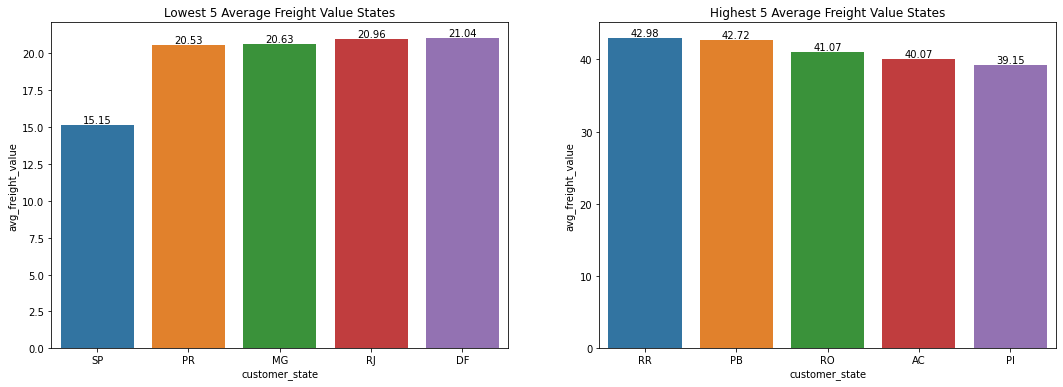

<Figure size 1296x432 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6), squeeze=False)
plt.figure(figsize=(18,6))
g1 = sns.barplot(x = 'customer_state', y = 'avg_freight_value', data = Lowest5AvgFreightStates, ax = axs[0, 0])
for i in g1.containers:
  g1.bar_label(i,)
g1.set_title("Lowest 5 Average Freight Value States", fontsize = 12)
g2 = sns.barplot(x = 'customer_state', y = 'avg_freight_value', data = Top5AvgFreightStates, ax = axs[0, 1])
for i in g2.containers:
  g2.bar_label(i,)
g2.set_title("Highest 5 Average Freight Value States", fontsize = 12)
plt.show()

Mean freight value is maximum 42.98 for RR State and 15.15 is minimum for SP state.



2. Top 5 states with highest/lowest average time to delivery

In [ ]:
%%bigquery --project target-365214 HighestAvgDeliveryTimeState
SELECT
  x.customer_state,
  ROUND(AVG(x.time_to_delivery), 2)AS avg_time_to_delivery
FROM (
  SELECT
    c.customer_state,
    oi.freight_value,
    DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS time_to_delivery,
    DATE_DIFF(order_estimated_delivery_date, order_delivered_customer_date, DAY) AS diff_estimated_delivery
  FROM
    `Target_Data.CustomerPurchaseView` AS CP
  JOIN
    `Target_Data.order_items` AS OI
  ON
    CP.order_id = OI.order_id
  JOIN
    `Target_Data.customers` AS C
  ON
    CP.customer_id = C.customer_id ) AS x
GROUP BY
  x.customer_state
ORDER BY
  AVG(x.time_to_delivery) DESC
LIMIT
  5;

In [ ]:
HighestAvgDeliveryTimeState

,customer_state,avg_time_to_delivery
0,RR,27.83
1,AP,27.75
2,AM,25.96
3,AL,23.99
4,PA,23.30


In [ ]:
%%bigquery --project target-365214 LowestAvgDeliveryTimeState
SELECT
  x.customer_state,
  ROUND(AVG(x.time_to_delivery), 2)AS avg_time_to_delivery
FROM (
  SELECT
    c.customer_state,
    oi.freight_value,
    DATE_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS time_to_delivery,
    DATE_DIFF(order_estimated_delivery_date, order_delivered_customer_date, DAY) AS diff_estimated_delivery
  FROM
    `Target_Data.CustomerPurchaseView` AS CP
  JOIN
    `Target_Data.order_items` AS OI
  ON
    CP.order_id = OI.order_id
  JOIN
    `Target_Data.customers` AS C
  ON
    CP.customer_id = C.customer_id ) AS x
GROUP BY
  x.customer_state
ORDER BY
  AVG(x.time_to_delivery)
LIMIT
  5;

In [ ]:
LowestAvgDeliveryTimeState

,customer_state,avg_time_to_delivery
0,SP,8.26
1,PR,11.48
2,MG,11.52
3,DF,12.50
4,SC,14.52


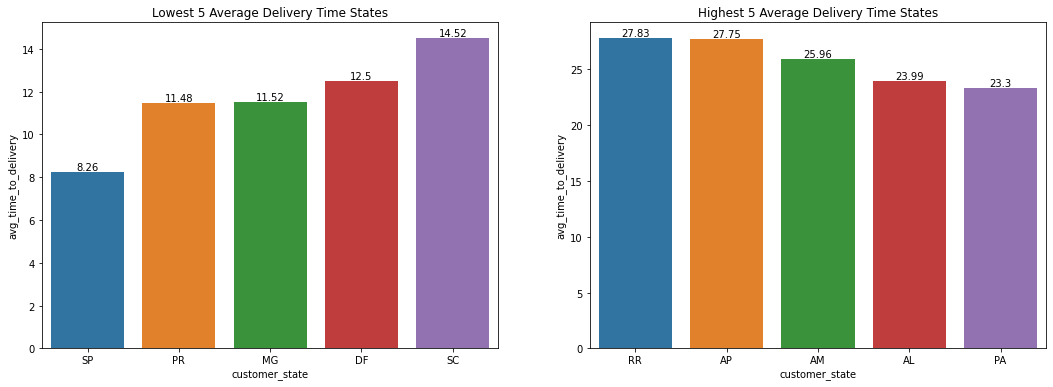

<Figure size 1296x432 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6), squeeze=False)
plt.figure(figsize=(18,6))
g1 = sns.barplot(x = 'customer_state', y = 'avg_time_to_delivery', data = LowestAvgDeliveryTimeState, ax = axs[0, 0])
for i in g1.containers:
  g1.bar_label(i,)
g1.set_title("Lowest 5 Average Delivery Time States", fontsize = 12)
g2 = sns.barplot(x = 'customer_state', y = 'avg_time_to_delivery', data = HighestAvgDeliveryTimeState, ax = axs[0, 1])
for i in g2.containers:
  g2.bar_label(i,)
g2.set_title("Highest 5 Average Delivery Time States", fontsize = 12)
plt.show()

Mean time to delivery 27.83 is maximum for RR state and 8.26 is minimum for SP state.
May be as most of the sellers are from SP state and Most of the customers are also from SP State taht can be the reson for such less delivery time


3. Top 5 states where delivery is really fast/ not so fast compared to estimated date

In [ ]:
%%bigquery --project target-365214 NotSoFastDeliveryState
SELECT
  x.customer_state,
  ROUND(AVG(x.diff_estimated_delivery),2) AS avg_diff_estimated_delivery
FROM (
  SELECT
    C.customer_state,
    OI.freight_value,
    TIMESTAMP_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS time_to_delivery,
    TIMESTAMP_DIFF(order_estimated_delivery_date, order_delivered_customer_date, DAY) AS diff_estimated_delivery
  FROM
    `Target_Data.CustomerPurchaseView` AS CP
  JOIN
    `Target_Data.order_items` AS OI
  ON
    CP.order_id = OI.order_id
  JOIN
    `Target_Data.customers` AS C
  ON
    CP.customer_id = C.customer_id ) AS x
GROUP BY
  x.customer_state
ORDER BY
  AVG(x.diff_estimated_delivery) DESC
LIMIT
  5;

In [ ]:
NotSoFastDeliveryState

,customer_state,avg_diff_estimated_delivery
0,AC,20.01
1,RO,19.08
2,AM,18.98
3,AP,17.44
4,RR,17.43


In [ ]:
%%bigquery --project target-365214 FastDeliveryState
SELECT
  x.customer_state,
  ROUND(AVG(x.diff_estimated_delivery),2) AS avg_diff_estimated_delivery
FROM (
  SELECT
    C.customer_state,
    OI.freight_value,
    TIMESTAMP_DIFF(order_delivered_customer_date, order_purchase_timestamp, DAY) AS time_to_delivery,
    TIMESTAMP_DIFF(order_estimated_delivery_date, order_delivered_customer_date, DAY) AS diff_estimated_delivery
  FROM
    `Target_Data.CustomerPurchaseView` AS CP
  JOIN
    `Target_Data.order_items` AS OI
  ON
    CP.order_id = OI.order_id
  JOIN
    `Target_Data.customers` AS C
  ON
    CP.customer_id = C.customer_id ) AS x
GROUP BY
  x.customer_state
ORDER BY
  AVG(x.diff_estimated_delivery)
LIMIT
  5;

In [ ]:
FastDeliveryState

,customer_state,avg_diff_estimated_delivery
0,AL,7.98
1,MA,9.11
2,SE,9.17
3,ES,9.77
4,BA,10.12


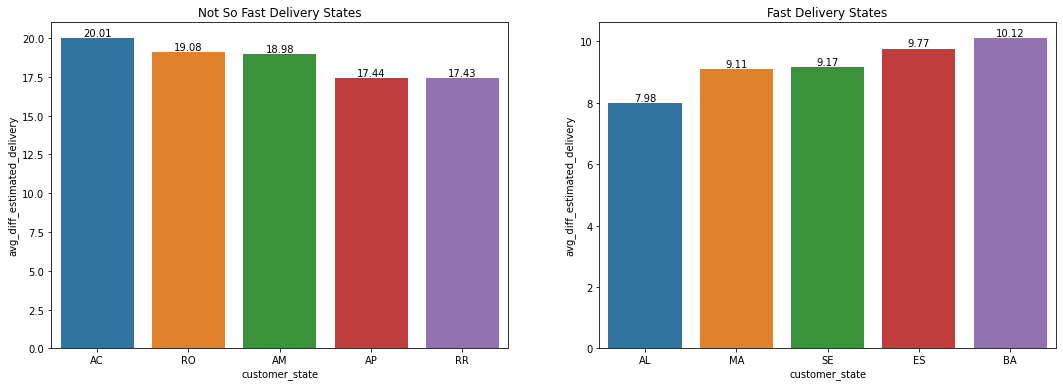

<Figure size 1296x432 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6), squeeze=False)
plt.figure(figsize=(18,6))
g1 = sns.barplot(x = 'customer_state', y = 'avg_diff_estimated_delivery', data = NotSoFastDeliveryState, ax = axs[0, 0])
for i in g1.containers:
  g1.bar_label(i,)
g1.set_title("Not So Fast Delivery States", fontsize = 12)
g2 = sns.barplot(x = 'customer_state', y = 'avg_diff_estimated_delivery', data = FastDeliveryState, ax = axs[0, 1])
for i in g2.containers:
  g2.bar_label(i,)
g2.set_title("Fast Delivery States", fontsize = 12)
plt.show()

Mean of difference in estimated delivery time 7.98 is minimum for AL state and
20.01 is maximum for AC state, so delivery is fastest in AL and slowest in AC state.

**Recommendation-**

Company should pay attention in AC state, RO STte, AM , AP AND RR States as why delivery times are more in these states

### 6.	Payment type analysis:

1.	Month over Month count of orders for different payment types

In [ ]:
%%bigquery --project target-365214 PaymentMethodAnalysisForMonths

SELECT
  P.payment_type,
  CP.purchaseMonth,
  COUNT(*) as orders,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage
FROM
  `Target_Data.CustomerPurchaseView` AS CP
JOIN
  `Target_Data.payments` AS P
ON
  CP.order_id = P.order_id
GROUP BY
  P.payment_type,
  CP.purchaseMonth
ORDER BY
  orders DESC

In [ ]:
PaymentMethodAnalysisForMonths.head(5)

,payment_type,purchaseMonth,orders,percentage
0,credit_card,5,8350,8.04
1,credit_card,8,8269,7.96
2,credit_card,7,7841,7.55
3,credit_card,3,7707,7.42
4,credit_card,4,7301,7.03


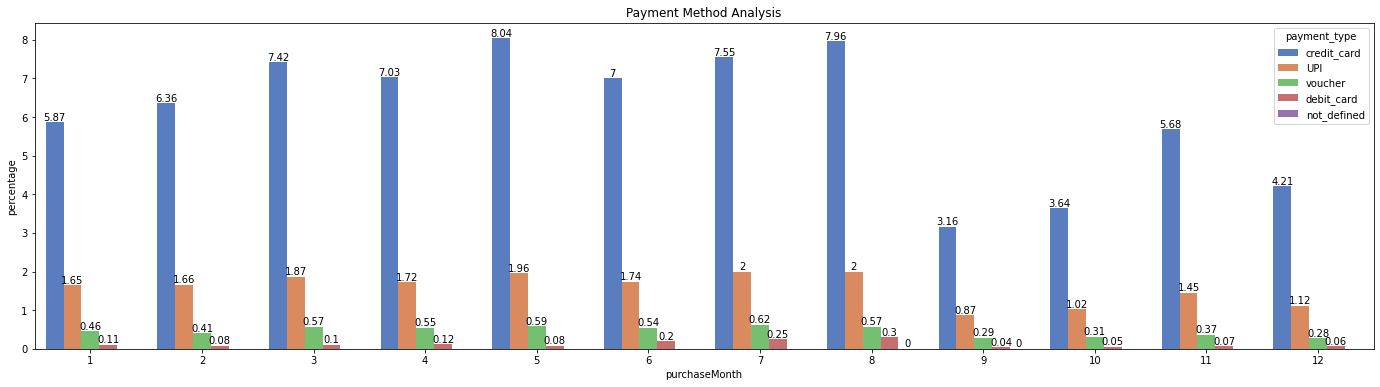

In [ ]:
plt.figure(figsize=(24,6))
ax = sns.barplot(x = 'purchaseMonth', y = 'percentage', data = PaymentMethodAnalysisForMonths, hue = "payment_type", palette= 'muted')
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Payment Method Analysis", fontsize = 12)
plt.show()

From the given data in the every month large number of customers opt for credit card payment in very large extent and then for UPI and very less people go with other options like voucher and debit card

**Recommendation-**

UPI payments are gaining popularity so company should take proper measure
that at all stores UPI payment facility is available. Credit cards are the most preferred mode of
payment so company should collaborate with popular credit card companies and bring more offers
on credit cards to attract even more customers.


2.	Distribution of payment installments and count of orders

In [ ]:
%%bigquery --project target-365214 PaymentInstallmentAnalysis
SELECT
  payment_installments,
  COUNT(*) AS count_,
  ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER(), 2) AS percentage
FROM
  `Target_Data.CustomerPurchaseView` AS CP
JOIN
  `Target_Data.payments` AS P
ON
  CP.order_id = P.order_id
GROUP BY
  payment_installments
ORDER BY
  COUNT(*) DESC;

In [ ]:
PaymentInstallmentAnalysis.head()

,payment_installments,count_,percentage
0,1,52546,50.58
1,2,12413,11.95
2,3,10461,10.07
3,4,7098,6.83
4,10,5328,5.13


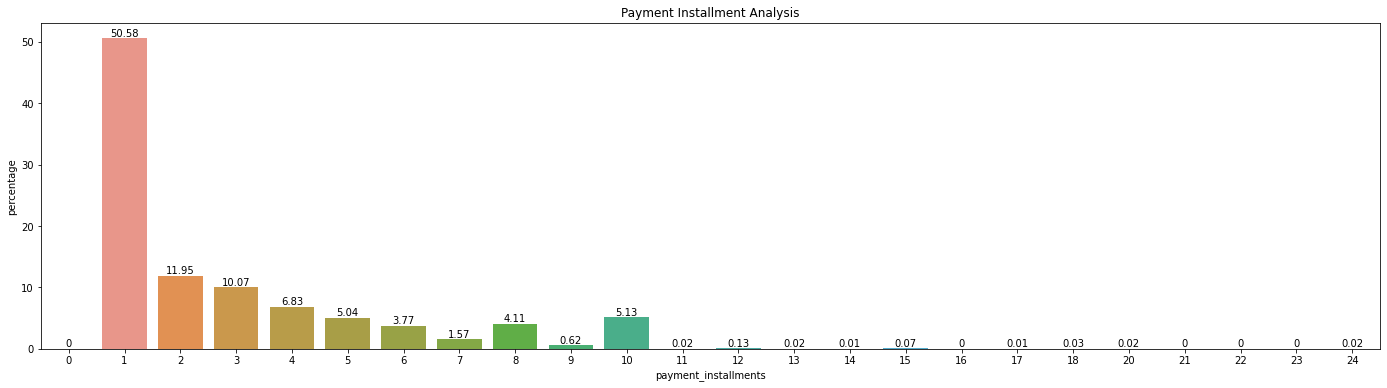

In [ ]:
plt.figure(figsize=(24,6))
ax = sns.barplot(x = 'payment_installments', y = 'percentage', data = PaymentInstallmentAnalysis)
for i in ax.containers:
  ax.bar_label(i,)
ax.set_title("Payment Installment Analysis", fontsize = 12)
plt.show()


Most number of payments were made for the 1st instalment. Payment counts
kept on decreasing with the increasing number of payment instalment